In [118]:
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np

#Data reading
#Load train and test csv file
dengue_features_train = pd.read_csv('dataset/dengue_features_train.csv')
dengue_labels_train = pd.read_csv('dataset/dengue_labels_train.csv')
dengue_test = pd.read_csv("dataset/dengue_features_test.csv")

In [119]:
dengue_features_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [120]:
#Let's fusion the 2 dataframes:
#Merging the Train dataframe with the labels data frame 

dengue_train = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

dengue_train_sj = dengue_train[dengue_train.city == 'sj'].copy()
dengue_train_iq = dengue_train[dengue_train.city == 'iq'].copy()
dengue_test_sj = dengue_test[dengue_train.city == 'sj'].copy()
dengue_test_iq = dengue_test[dengue_train.city == 'iq'].copy()


/home/anubhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/anubhav/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [121]:
dengue_train_sj.fillna(method='ffill', inplace=True)
dengue_train_iq.fillna(method='ffill', inplace=True)

dengue_test_sj.fillna(method='ffill', inplace=True)
dengue_test_iq.fillna(method='ffill', inplace=True)

In [122]:
#A few bad variables
#we can drop the columns with negative corellation in both 

dengue_train_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_train_sj.drop('year', axis=1, inplace=True)
dengue_train_iq.drop('year', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_train_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_train_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_train_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_train_sj.drop('weekofyear', axis=1, inplace=True)
dengue_train_iq.drop('weekofyear', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_nw', axis=1, inplace=True)

In [123]:
#A few bad variables
#we can drop the columns with negative corellation in both 
dengue_test_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_test_sj.drop('year', axis=1, inplace=True)
dengue_test_iq.drop('year', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_test_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_test_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_test_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_test_sj.drop('weekofyear', axis=1, inplace=True)
dengue_test_iq.drop('weekofyear', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_nw', axis=1, inplace=True)

In [124]:
#Check duplicate rows
np.sum(dengue_train_sj.duplicated())

0

In [125]:
dengue_train_sj.head()

,city,total_cases,week_start_date,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,4,1990-04-30,0.177617,12.42,297.572857,297.742857,292.414286,295.9,32.00,73.365714,12.42,14.012857,25.442857,29.4,20.0,16.0
1,sj,5,1990-05-07,0.155486,22.82,298.211429,298.442857,293.951429,296.4,17.94,77.368571,22.82,15.372857,26.714286,31.7,22.2,8.6
2,sj,4,1990-05-14,0.170843,34.54,298.781429,298.878571,295.434286,297.3,26.10,82.052857,34.54,16.848571,26.714286,32.2,22.8,41.4
3,sj,3,1990-05-21,0.235886,15.36,298.987143,299.228571,295.310000,297.0,13.90,80.337143,15.36,16.672857,27.471429,33.3,23.3,4.0
4,sj,6,1990-05-28,0.247340,7.52,299.518571,299.664286,295.821429,297.5,12.20,80.460000,7.52,17.210000,28.942857,35.0,23.9,5.8


In [126]:
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

from sklearn.cross_validation import train_test_split
import statsmodels.api as sm


from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf

In [127]:
len(dengue_train_sj)

936

In [128]:
len(dengue_train_iq)

520

In [129]:
sj_train_subtrain = dengue_train_sj.head(800)
sj_train_subtest = dengue_train_sj.tail(dengue_train_sj.shape[0] - 800)

iq_train_subtrain = dengue_train_iq.head(400)
iq_train_subtest = dengue_train_iq.tail(dengue_train_iq.shape[0] - 400)

In [130]:
import patsy

## Training GLM Model

In [131]:
def get_best_model(train, test):
    # Step 1: specify the form of the model
    model_formula = "total_cases ~ 1 + " \
                    "reanalysis_specific_humidity_g_per_kg + " \
                    "reanalysis_dew_point_temp_k + " \
                    "reanalysis_min_air_temp_k + " \
                    "station_min_temp_c + " \
                    "station_max_temp_c + " \
                    "station_avg_temp_c"
        
    
    grid = 10 ** np.arange(-8, -3, dtype=np.float64)
                    
    best_alpha = []
    best_score = 1000
        
    # Step 2: Find the best hyper parameter, alpha
    for alpha in grid:
        model = smf.glm(formula=model_formula,data=train,family=sm.families.NegativeBinomial(alpha=alpha))
        results = model.fit()
        predictions = results.predict(test).astype(int)
        score = eval_measures.meanabs(predictions, test.total_cases)

        if score < best_score:
            best_alpha = alpha
            best_score = score

    print('best alpha = ', best_alpha)
    print('best score = ', best_score)
            
    # Step 3: refit on entire dataset
    full_dataset = pd.concat([train, test])
    model = smf.glm(formula=model_formula,
                    data=full_dataset,
                    family=sm.families.NegativeBinomial(alpha=best_alpha))

    fitted_model = model.fit()
    return fitted_model
    
sj_best_model = get_best_model(sj_train_subtrain, sj_train_subtest)
iq_best_model = get_best_model(iq_train_subtrain, iq_train_subtest)

best alpha =  1e-08
best score =  22.63235294117647
best alpha =  1e-08
best score =  6.641666666666667


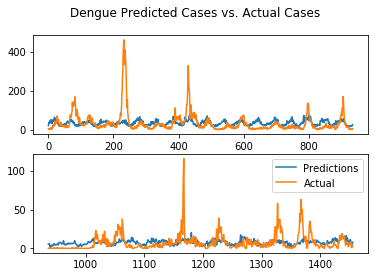

In [132]:

figs, axes = plt.subplots(nrows=2, ncols=1)

# plot sj
dengue_train_sj['fitted'] = sj_best_model.fittedvalues
dengue_train_sj.fitted.plot(ax=axes[0], label="Predictions")
dengue_train_sj.total_cases.plot(ax=axes[0], label="Actual")

# plot iq
dengue_train_iq['fitted'] = iq_best_model.fittedvalues
dengue_train_iq.fitted.plot(ax=axes[1], label="Predictions")
dengue_train_iq.total_cases.plot(ax=axes[1], label="Actual")

plt.suptitle("Dengue Predicted Cases vs. Actual Cases")
plt.legend()

In [133]:
sj_predictions = sj_best_model.predict(dengue_train_sj).astype(int)
iq_predictions = iq_best_model.predict(dengue_train_iq).astype(int)

## Creating Submission Format

In [134]:
sj_predictions = sj_best_model.predict(dengue_test_sj).astype(int)
iq_predictions = iq_best_model.predict(dengue_test_iq).astype(int)

submission = pd.read_csv("dataset/submission_format.csv",index_col=[0, 1, 2])
len(submission)
submission.total_cases = np.concatenate([sj_predictions, iq_predictions])
submission.to_csv("dataset/Model_1_Forecasted_Values.csv")